In [1]:
import numpy as np

In [14]:
import matplotlib.pyplot as plt

In [2]:
def evalf(x):  
  #Input: x is a numpy array of size 2
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments
  #arr=np.array([(1/(8^i))*((x[i-1]-2^i)^2) for i in range(1,4)])
  #return np.sum(arr)
  return 512*(x[1]-x[0]**2)**2+(4-x[0])**2

In [3]:
def evalg(x):  
  #Input: x is a numpy array of size 2
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  
  return np.array([-2048*x[0]*(x[1]-x[0]**2)-2*(4-x[0]), 1024*(x[1]-x[0]**2)])

In [4]:
#Complete the module to compute the steplength by using the backtracking line search
def compute_steplength_backtracking(x, gradf, alpha_start, rho, gamma): #add appropriate arguments to the function 
  assert type(x) is np.ndarray and len(x) == 2 
  assert type(gradf) is np.ndarray and len(gradf) == 2 
  
  alpha = alpha_start
  pk=-gradf
  #print('x: ',x)
  while evalf(x+alpha*pk)>evalf(x)+gamma*alpha*np.linalg.multi_dot([gradf,pk]):
    alpha=rho*alpha

  #print('final step length:',alpha)
  return alpha

**Q 1**

Differentiating function wrt to $x_1$ and equating to $0$ gives $x_1=4$ and similarly differentiating function wrt $x_2$ and equating to $0$ gives $x_2=16$. So, $(x_1,x_2)=(4,16)$ can be point of minimum or point of maxmimum. Now since function value at this point is $0$ and function is sum of two square terms hence function will be always greater than or equal to zero. Hence, $(4,16)$ is minimizer and $0$ is the minimum function value.

**Q 2**

We cannot find close form solution for this function because the given function cannot be expressed in the form $\mathbf{x}^\top \mathbf{A} \mathbf{x} + 2 \mathbf{b}^\top \mathbf{x} + c$, where $\mathbf{x}\in {\mathbb{R}}^2$, $\mathbf{A}$ is a symmetric matrix of size $2 \times 2$, $\mathbf{b}\in{\mathbb{R}}^2$ and $c\in\mathbb{R}$. 

In [5]:
def find_minimizer_bls(start_x,tol,alpha_s,rho_s,gamma_s):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments
  assert type(tol) is float and tol>=0 
  x = start_x
  g_x = evalg(x)
  k = 0

  #alpha_s=alpha
  #rho_s=rho
  #gamma_s=gamma
  #we can manage a list to store the function values, might be useful for plotting 
  #fvals = [evalf(x)]
  #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))

  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
    step_length = compute_steplength_backtracking(x,g_x, alpha_s,rho_s,gamma_s)
    x = np.subtract(x, np.multiply(step_length,g_x)) #update x = x - step_length*g_x
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point

    #append the current function value to the list containing function values
    #fvals.append(evalf(x))
    #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))
  print('For alpha = ',alpha_s)
  print('Number of iterations taken is: ', k,' Minimizer is: ', x)
  return x, evalf(x),k

**Q 5**

In [6]:
start_x=np.array([4,4], dtype='double')
tol=1e-5
gamma=0.5
rho=0.5
alpha=[1,0.9,0.75,0.6,0.5,0.4,0.25,0.1,0.01]

In [7]:
minimizer_values={}
fun_obj_values={}
no_of_iters={}

for i in alpha:
  minimizer_values[i],fun_obj_values[i],no_of_iters[i]=find_minimizer_bls(start_x,tol,i,rho,gamma)

For alpha =  1
Number of iterations taken is:  937301  Minimizer is:  [ 3.99995979 15.99967832]
For alpha =  0.9
Number of iterations taken is:  2579228  Minimizer is:  [ 3.99995989 15.9996791 ]
For alpha =  0.75
Number of iterations taken is:  7941373  Minimizer is:  [ 3.99996173 15.99969379]
For alpha =  0.6
Number of iterations taken is:  3937558  Minimizer is:  [ 3.99996036 15.99968288]
For alpha =  0.5
Number of iterations taken is:  937301  Minimizer is:  [ 3.99995979 15.99967832]
For alpha =  0.4
Number of iterations taken is:  6067322  Minimizer is:  [ 3.99996081 15.99968647]
For alpha =  0.25
Number of iterations taken is:  937339  Minimizer is:  [ 3.99995977 15.99967814]
For alpha =  0.1
Number of iterations taken is:  6067322  Minimizer is:  [ 3.99996081 15.99968647]
For alpha =  0.01
Number of iterations taken is:  5309493  Minimizer is:  [ 3.99996079 15.99968629]


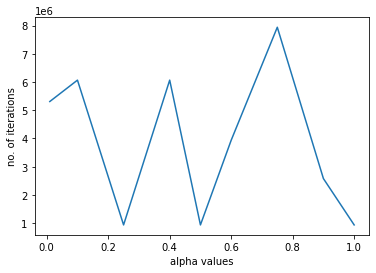

In [15]:
iters=[no_of_iters[i] for i in alpha] #list which contains no of iterations and it will be used to plot the required curve

plt.plot(alpha, iters)
# naming the x axis
plt.xlabel('alpha values')
# naming the y axis
plt.ylabel('no. of iterations')
plt.show()

There is no proper trend in the number of iteration with respect to the value of alpha. It is difficult to guess that for which alpha number of iterations will be less.

Also as it is taking a very long time, it took more than two hours, to get solution so we should use other methods to solve this.

**Q 6**

In [11]:
def find_minimizer_bls_6(start_x,tol,alpha_s,rho_s,gamma_s):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments
  assert type(tol) is float and tol>=0 
  x = start_x
  g_x = evalg(x)
  k = 0


  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
    step_length = compute_steplength_backtracking(x,g_x, alpha_s,rho_s,gamma_s)
    x = np.subtract(x, np.multiply(step_length,g_x)) #update x = x - step_length*g_x
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point

  print('For rho = ',rho_s)
  print('Number of iterations taken is: ', k,' Minimizer is: ', x)
  return x, evalf(x),k

In [8]:
gamma=0.5
rhoo=[0.9, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]
alph=1

In [12]:
minimizer_values_6={}
fun_obj_values_6={}
no_of_iters_6={}

for i in rhoo:
  minimizer_values_6[i],fun_obj_values_6[i],no_of_iters_6[i]=find_minimizer_bls_6(start_x,tol,alph,i,gamma)

For rho =  0.9
Number of iterations taken is:  1671540  Minimizer is:  [ 3.99995994 15.9996795 ]
For rho =  0.75
Number of iterations taken is:  3707435  Minimizer is:  [ 3.99996092 15.99968734]
For rho =  0.6
Number of iterations taken is:  4416822  Minimizer is:  [ 3.99996039 15.99968312]
For rho =  0.5
Number of iterations taken is:  937301  Minimizer is:  [ 3.99995979 15.99967832]
For rho =  0.4
Number of iterations taken is:  3037943  Minimizer is:  [ 3.99996027 15.99968219]
For rho =  0.25
Number of iterations taken is:  921362  Minimizer is:  [ 3.99995989 15.9996791 ]
For rho =  0.1
Number of iterations taken is:  7341010  Minimizer is:  [ 3.99996009 15.99968072]
For rho =  0.01
Number of iterations taken is:  68205871  Minimizer is:  [ 3.99996248 15.99969985]


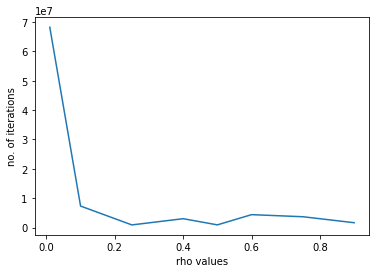

In [17]:
iters=[no_of_iters_6[i] for i in rhoo] #list which contains no of iterations and it will be used to plot the required curve

plt.plot(rhoo, iters)
# naming the x axis
plt.xlabel('rho values')
# naming the y axis
plt.ylabel('no. of iterations')
plt.show()

Unlike in previous case here we can see a trend that for rho value very close to 0 i.e less than 0.1 it takes very large no. of itertions as compared to that of other rho values.

Here also it took very large amount of time. So, we need to find another algorithms to solve this.